In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'sales': [100, 50, 14, 94, 20, 45, 56, 18, 125],
    'CTA Variant': ['A', 'B', 'C', 'A', 'C', 'B', 'B', 'C', 'A']
}, index = pd.date_range("12:30", "21:00", freq="60min")
)

In [3]:
df.head()

,sales,CTA Variant
2020-12-12 12:30:00,100,A
2020-12-12 13:30:00,50,B
2020-12-12 14:30:00,14,C
2020-12-12 15:30:00,94,A
2020-12-12 16:30:00,20,C


In [4]:
sales = pd.read_csv("sales.csv")
sales.head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sales.loc[sales['Retailer country']=='United States', ['Revenue', 'Quantity', 'Gross profit']].head()

,Revenue,Quantity,Gross profit
0,5819.70,619.0,4086.50
2,10904.28,1068.0,7913.88
4,NaN,NaN,NaN
63,159492.97,16137.0,114309.37
65,159040.72,15773.0,114876.32


In [6]:
sales.rename({'Revenue':'Earnings'}, axis = 1).head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Earnings,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sales['Unit cost'].quantile([0.0, 0.25,0.5,0.75,1])

0.00       0.85
0.25       2.76
0.50       9.00
0.75      34.97
1.00    7833.00
Name: Unit cost, dtype: float64

In [8]:
def cat_gen(x):
    if pd.isnull(x):
        return np.nan
    elif x<=2.76:
        return "cheap"
    elif 2.76<x<=9.0:
        return "medium"
    elif 9.0<x<=34.97:
        return "moderate"
    else:
        return "expensive"
    
sales['Cost category'] = sales['Unit cost'].map(cat_gen)
sales['Cost category'].value_counts(dropna = True)

cheap        1644
medium       1520
expensive    1503
moderate     1378
Name: Cost category, dtype: int64

In [9]:
sales['Unit cost'] = sales['Unit cost'].astype('category')
sales.dtypes

Year                    int64
Product line           object
Product type           object
Product                object
Order method type      object
Retailer country       object
Revenue               float64
Planned revenue       float64
Product cost          float64
Quantity              float64
Unit cost            category
Unit price            float64
Gross profit          float64
Unit sale price       float64
Cost category          object
dtype: object

In [10]:
cta = pd.read_csv('CTA_comparison.csv')
cta

,time,CTA Variant,views,sales
0,12:30:00,A,500,100
1,13:30:00,B,800,50
2,14:30:00,C,300,14
3,15:30:00,A,700,94
4,16:30:00,C,300,20
5,17:30:00,B,800,45
6,18:30:00,B,800,56
7,19:30:00,C,250,18
8,20:30:00,A,500,125


In [11]:
cta.set_index('CTA Variant')

,time,views,sales
CTA Variant,,,
A,12:30:00,500,100
B,13:30:00,800,50
C,14:30:00,300,14
A,15:30:00,700,94
C,16:30:00,300,20
B,17:30:00,800,45
B,18:30:00,800,56
C,19:30:00,250,18
A,20:30:00,500,125


In [12]:
cta.set_index(['CTA Variant', 'views'])

time  sales
CTA Variant views                 
A           500    12:30:00    100
B           800    13:30:00     50
C           300    14:30:00     14
A           700    15:30:00     94
C           300    16:30:00     20
B           800    17:30:00     45
            800    18:30:00     56
C           250    19:30:00     18
A           500    20:30:00    125

In [13]:
cta_views = cta.groupby(['CTA Variant', 'views']).count()
cta_views

time  sales
CTA Variant views             
A           500       2      2
            700       1      1
B           800       3      3
C           250       1      1
            300       2      2

In [14]:
h1 = cta_views.unstack(level = 'CTA Variant')
h1

time           sales          
CTA Variant    A    B    C     A    B    C
views                                     
250          NaN  NaN  1.0   NaN  NaN  1.0
300          NaN  NaN  2.0   NaN  NaN  2.0
500          2.0  NaN  NaN   2.0  NaN  NaN
700          1.0  NaN  NaN   1.0  NaN  NaN
800          NaN  3.0  NaN   NaN  3.0  NaN

In [15]:
h1.stack(0)

CTA Variant    A    B    C
views                     
250   sales  NaN  NaN  1.0
      time   NaN  NaN  1.0
300   sales  NaN  NaN  2.0
      time   NaN  NaN  2.0
500   sales  2.0  NaN  NaN
      time   2.0  NaN  NaN
700   sales  1.0  NaN  NaN
      time   1.0  NaN  NaN
800   sales  NaN  3.0  NaN
      time   NaN  3.0  NaN

In [16]:
data = pd.read_csv("conversion_rates.csv")
data.head()

,converted,group
0,0,B
1,0,B
2,0,A
3,0,B
4,0,A


In [17]:
data.pivot(columns = 'group', values='converted').head()

group,A,B
0,NaN,0.0
1,NaN,0.0
2,0.0,NaN
3,NaN,0.0
4,0.0,NaN


In [18]:
data.pivot_table(index = 'group', columns = 'converted', aggfunc= len)

converted,0,1
group,,
A,940,90
B,949,21


C:\Users\Madhuvanthi\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gross profit'>

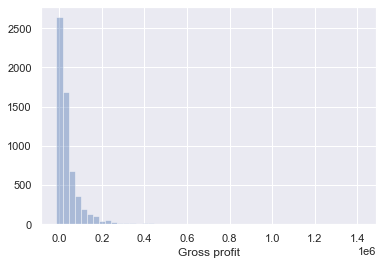

In [20]:
import seaborn as sns
sns.set()
sns.distplot(sales['Gross profit'].dropna(), kde = False)

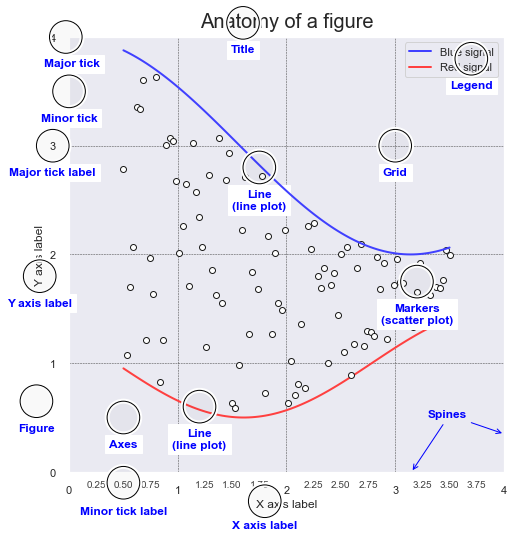

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(42)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))


plt.show()

<ipython-input-22-66e282335353>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().xaxis.set_minor_locator(AutoMinorLocator(4))
<ipython-input-22-66e282335353>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().yaxis.set_major_locator(MultipleLocator(1.000))
<ipython-input-22-66e282335353>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier

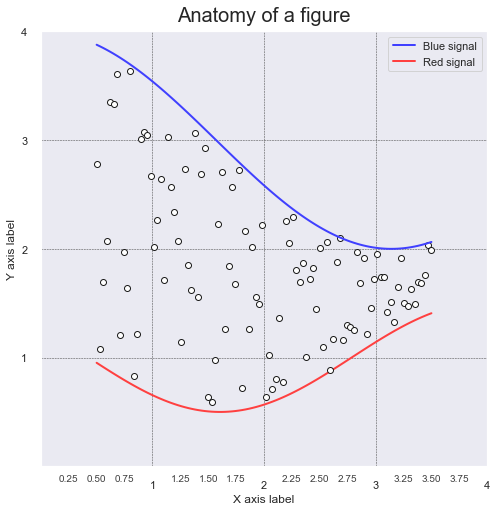

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(42)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1, aspect=1)

def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

plt.axes().xaxis.set_major_locator(MultipleLocator(1.000))
plt.axes().xaxis.set_minor_locator(AutoMinorLocator(4))
plt.axes().yaxis.set_major_locator(MultipleLocator(1.000))
plt.axes().yaxis.set_minor_locator(AutoMinorLocator(4))
plt.axes().xaxis.set_minor_formatter(FuncFormatter(minor_tick))


plt.xticks([1.000, 2.000,3.000,4.000])
plt.yticks([1.000, 2.000,3.000,4.000])
plt.xlim(0, 4)
plt.ylim(0, 4)

plt.tick_params(which='major', width=1.0)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', width=1.0, labelsize=10)
plt.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

plt.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
plt.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
plt.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

plt.title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

plt.legend()

plt.show()